In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pal = sns.color_palette()

In [4]:
dense_predictions = pd.read_csv('dense_predictions_data.csv')
deeper_predictions = pd.read_csv('deeper_predictions_data.csv')

In [6]:
dense_misclassified = dense_predictions[dense_predictions.is_duplicate != dense_predictions.dense_model_predictions]
dense_good_classified = dense_predictions[dense_predictions.is_duplicate == dense_predictions.dense_model_predictions]

deeper_misclassified = deeper_predictions[deeper_predictions.is_duplicate != deeper_predictions.deeper_model_predictions]
deeper_goodclassified = deeper_predictions[deeper_predictions.is_duplicate == deeper_predictions.deeper_model_predictions]

In [ ]:
def plot_chars_histogram(df_good_classified, df_misclassified , title):

  good_classified_qs = pd.Series(df_good_classified['question1'].tolist() + df_good_classified['question2'].tolist()).astype(str)
  misclassified_qs = pd.Series(df_misclassified['question1'].tolist() + df_misclassified['question2'].tolist()).astype(str)

  dist_good_classified = good_classified_qs.apply(len)
  dist_misclassified = misclassified_qs.apply(len)
  plt.figure(figsize=(15, 10))
  plt.hist(dist_good_classified, bins=200, range=[0, 200], color=pal[2], density=True, label='Right Classified')
  plt.hist(dist_misclassified, bins=200, range=[0, 200], color=pal[1], density=True, alpha=0.5, label='Wrong Classified')
  plt.title(title, fontsize=15)
  plt.legend()
  plt.xlabel('Number of characters', fontsize=15)
  plt.ylabel('Probability', fontsize=15)

  print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_good_classified.mean(), 
                            dist_good_classified.std(), dist_misclassified.mean(), dist_misclassified.std(), dist_good_classified.max(), dist_misclassified.max()))

mean-train 59.40 std-train 32.55 mean-test 50.92 std-test 23.91 max-train 1118.00 max-test 419.00


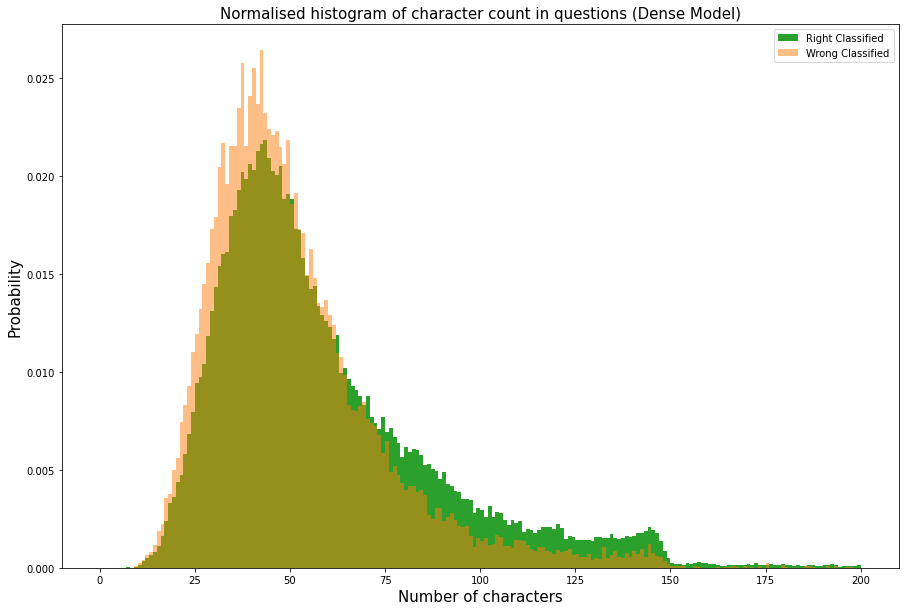

In [ ]:
title = 'Normalised histogram of character count in questions (Dense Model)'
plot_chars_histogram(dense_good_classified, dense_misclassified, title)

mean-train 60.63 std-train 33.47 mean-test 54.41 std-test 26.41 max-train 1130.00 max-test 598.00


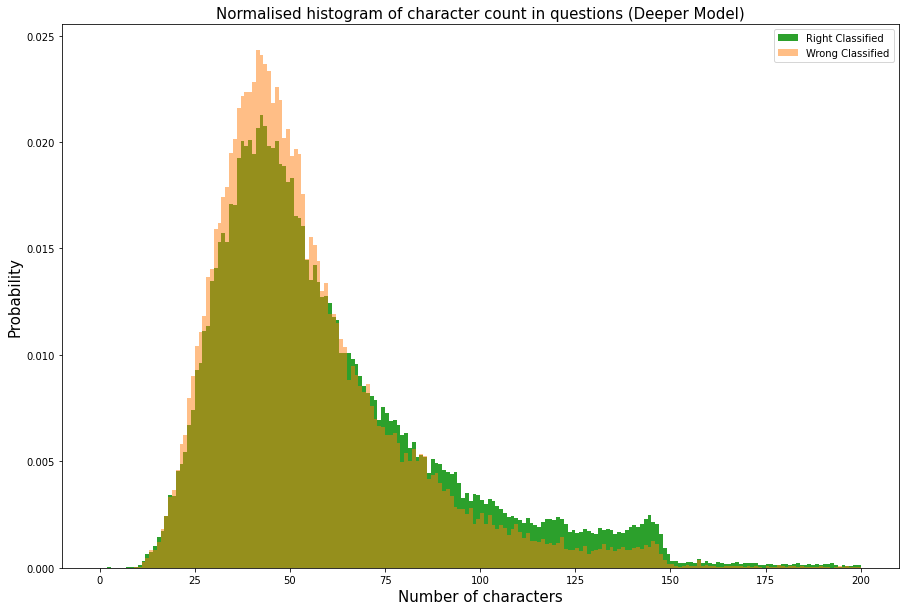

In [ ]:
title = 'Normalised histogram of character count in questions (Deeper Model)'
plot_chars_histogram(deeper_goodclassified, deeper_misclassified, title)

In [ ]:
def plot_words_histogram(df_good_classified, df_misclassified , title):

  good_classified_qs = pd.Series(df_good_classified['question1'].tolist() + df_good_classified['question2'].tolist()).astype(str)
  misclassified_qs = pd.Series(df_misclassified['question1'].tolist() + df_misclassified['question2'].tolist()).astype(str)


  dist_good_classified = good_classified_qs.apply(lambda x: len(x.split(' ')))
  dist_misclassified = misclassified_qs.apply(lambda x: len(x.split(' ')))

  plt.figure(figsize=(15, 10))
  plt.hist(dist_good_classified, bins=50, range=[0, 50], color=pal[2], density=True, label='Right Clasified')
  plt.hist(dist_misclassified, bins=50, range=[0, 50], color=pal[1], density=True, alpha=0.5, label='Wrong Classified')
  plt.title(title, fontsize=15)
  plt.legend()
  plt.xlabel('Number of words', fontsize=15)
  plt.ylabel('Probability', fontsize=15)

  print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_good_classified.mean(), 
                            dist_good_classified.std(), dist_misclassified.mean(), dist_misclassified.std(), dist_good_classified.max(), dist_misclassified.max()))

mean-train 11.27 std-train 6.15 mean-test 9.72 std-test 4.41 max-train 238.00 max-test 79.00


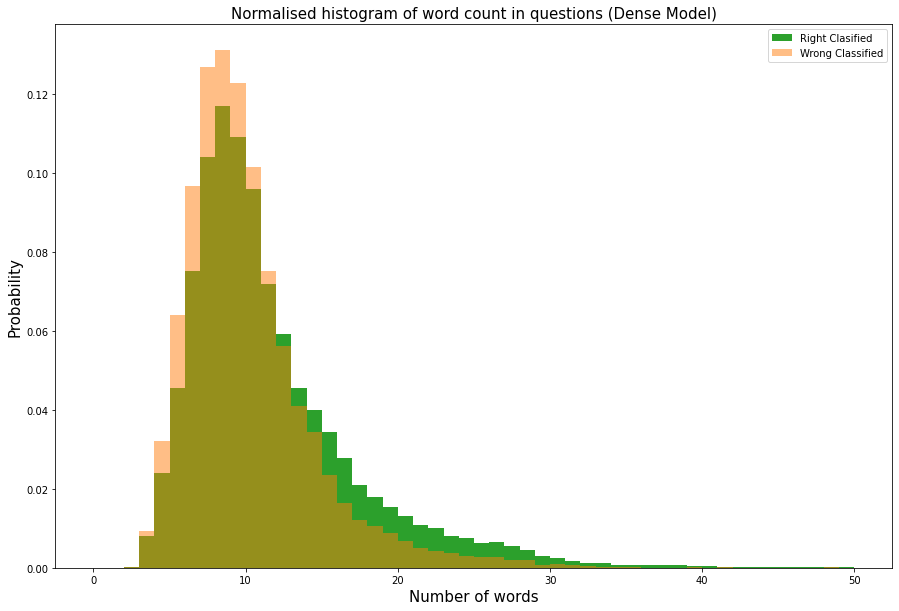

In [ ]:
title = 'Normalised histogram of word count in questions (Dense Model)'
plot_words_histogram(dense_good_classified, dense_misclassified, title)

mean-train 11.51 std-train 6.32 mean-test 10.35 std-test 4.90 max-train 238.00 max-test 125.00


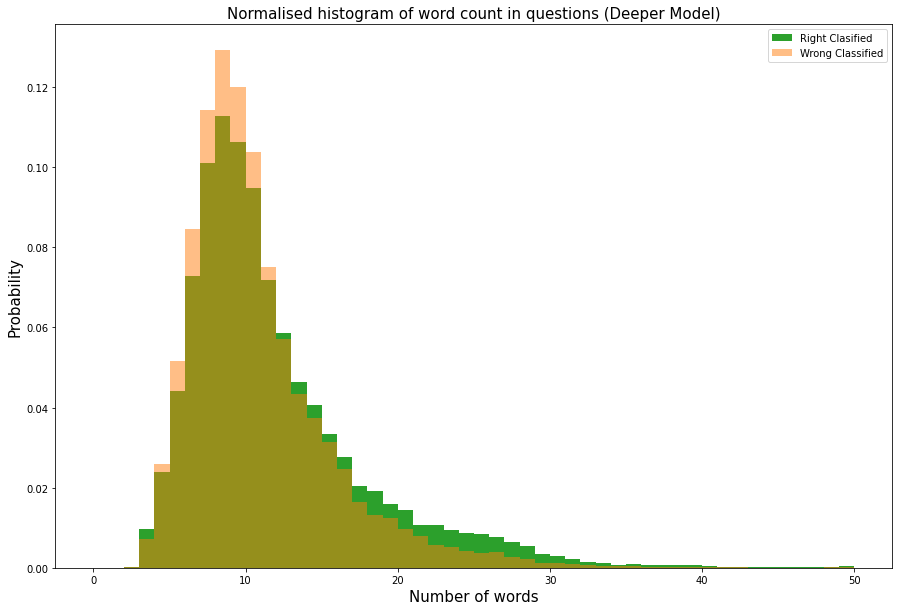

In [ ]:
title = 'Normalised histogram of word count in questions (Deeper Model)'
plot_words_histogram(deeper_goodclassified, deeper_misclassified, title)

In [5]:
dense_predictions

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len,dense_model_predictions
0,167668,167704,259943,259944,what are black bat cigarettes how do they diff...,what is black cigarette,0,15,4,0
1,257268,257332,358858,372621,is adobe indesign still relevant in todays wor...,whos more relevant in todays world and why the...,0,20,14,0
2,116505,116532,189810,189811,how do you say are you ok in french,do the french call them french fries,0,9,7,0
3,340824,340905,84488,468681,what kind of conversations only happen in college,what kinds of conversations only happen in iran,0,8,8,0
4,146690,146723,86943,2996,where can i get an affordable and hassle free ...,where can i get knowledgeable assistance for t...,1,15,12,1
...,...,...,...,...,...,...,...,...,...,...
99995,200599,200647,302467,302468,what purpose does the distal convoluted tubule...,how do i calculate pressureforce required to p...,0,8,26,0
99996,28537,28546,52920,52921,a good friend of mine is gay but we made out b...,a friend of mine feels a lot for me but i dont...,0,23,25,0
99997,267527,267593,83715,361946,snapchat deleted my recent memories how do i g...,can i delete my snapchat account and then sign...,0,11,11,0
99998,193249,193294,293163,293164,whats it like to be a corporate lawyer,what is it like to be a lawyer,0,8,8,0


### Top frequent words between right/wrong classified

In [23]:
from tqdm import tqdm as tq
tq.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [25]:
dense_good_classified.

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,quest1_len,quest2_len,dense_model_predictions
0,167668,167704,259943,259944,what are black bat cigarettes how do they diff...,what is black cigarette,0,15,4,0
1,257268,257332,358858,372621,is adobe indesign still relevant in todays wor...,whos more relevant in todays world and why the...,0,20,14,0
2,116505,116532,189810,189811,how do you say are you ok in french,do the french call them french fries,0,9,7,0
3,340824,340905,84488,468681,what kind of conversations only happen in college,what kinds of conversations only happen in iran,0,8,8,0
4,146690,146723,86943,2996,where can i get an affordable and hassle free ...,where can i get knowledgeable assistance for t...,1,15,12,1
...,...,...,...,...,...,...,...,...,...,...
99995,200599,200647,302467,302468,what purpose does the distal convoluted tubule...,how do i calculate pressureforce required to p...,0,8,26,0
99996,28537,28546,52920,52921,a good friend of mine is gay but we made out b...,a friend of mine feels a lot for me but i dont...,0,23,25,0
99997,267527,267593,83715,361946,snapchat deleted my recent memories how do i g...,can i delete my snapchat account and then sign...,0,11,11,0
99998,193249,193294,293163,293164,whats it like to be a corporate lawyer,what is it like to be a lawyer,0,8,8,0


In [30]:
dense_good_classified['num_common_words'] = dense_good_classified.progress_apply(lambda row:
                                                                                 len(set(row['question1'].lower().split()) & set(row['question2'].lower().split())) 
                                                                                 ,axis=1)

dense_misclassified['num_common_words'] = dense_misclassified.progress_apply(lambda row:
                                                                                 len(set(row['question1'].lower().split()) & set(row['question2'].lower().split())) 
                                                                                 ,axis=1)


deeper_goodclassified['num_common_words'] = deeper_goodclassified.progress_apply(lambda row:
                                                                                 len(set(row['question1'].lower().split()) & set(row['question2'].lower().split())) 
                                                                                 ,axis=1)

deeper_misclassified['num_common_words'] = deeper_misclassified.progress_apply(lambda row:
                                                                                 len(set(row['question1'].lower().split()) & set(row['question2'].lower().split())) 
                                                                                 ,axis=1)



  0%|          | 0/86660 [00:00<?, ?it/s]

  3%|▎         | 2977/86660 [00:00<00:02, 29765.63it/s]

  8%|▊         | 7105/86660 [00:00<00:02, 32483.65it/s]

 13%|█▎        | 10854/86660 [00:00<00:02, 33838.63it/s]

 17%|█▋        | 14995/86660 [00:00<00:02, 35801.76it/s]

 22%|██▏       | 19140/86660 [00:00<00:01, 37326.74it/s]

 26%|██▋       | 22872/86660 [00:00<00:01, 37324.33it/s]

 31%|███       | 27081/86660 [00:00<00:01, 38635.06it/s]

 36%|███▌      | 31187/86660 [00:00<00:01, 39311.50it/s]

 41%|████▏     | 35792/86660 [00:00<00:01, 41114.88it/s]

 47%|████▋     | 40497/86660 [00:01<00:01, 42730.91it/s]

 52%|█████▏    | 45436/86660 [00:01<00:00, 44530.23it/s]

 58%|█████▊    | 50449/86660 [00:01<00:00, 46073.84it/s]

 64%|██████▎   | 55067/86660 [00:01<00:00, 45836.52it/s]

 69%|██████▉   | 59658/86660 [00:01<00:00, 45792.37it/s]

 74%|███████▍  | 64243/86660 [00:01<00:00, 44991.48it/s]

 80%|███████▉  | 68983/86660 [00:01<00:00, 45686.38it/s]

 85%|████████▍ | 73559/86660 

In [37]:
def plot_common_words(good_classified, misclassified, title):
  plt.figure(figsize=(15, 10))
  plt.hist(good_classified, bins=20, range=[0, 20], color=pal[0], density=True, label='Right Classified')
  plt.hist(misclassified, bins=20, range=[0, 20], color=pal[2], density=True, alpha=0.5, label='Wrong Classified')
  plt.title(title, fontsize=15)
  plt.legend()
  plt.xlabel('Number of common words in q(1) & q(2)', fontsize=15)
  plt.ylabel('Probability', fontsize=15)

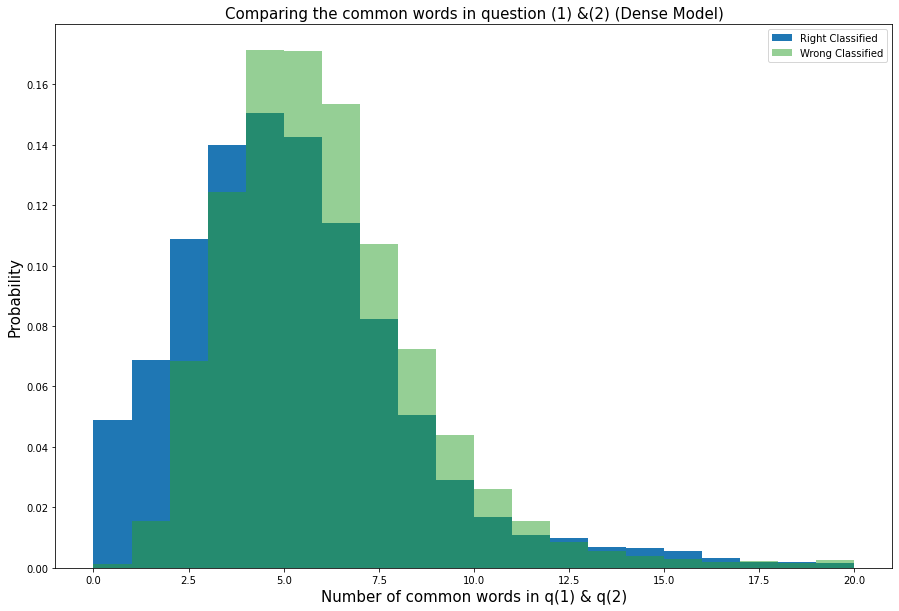

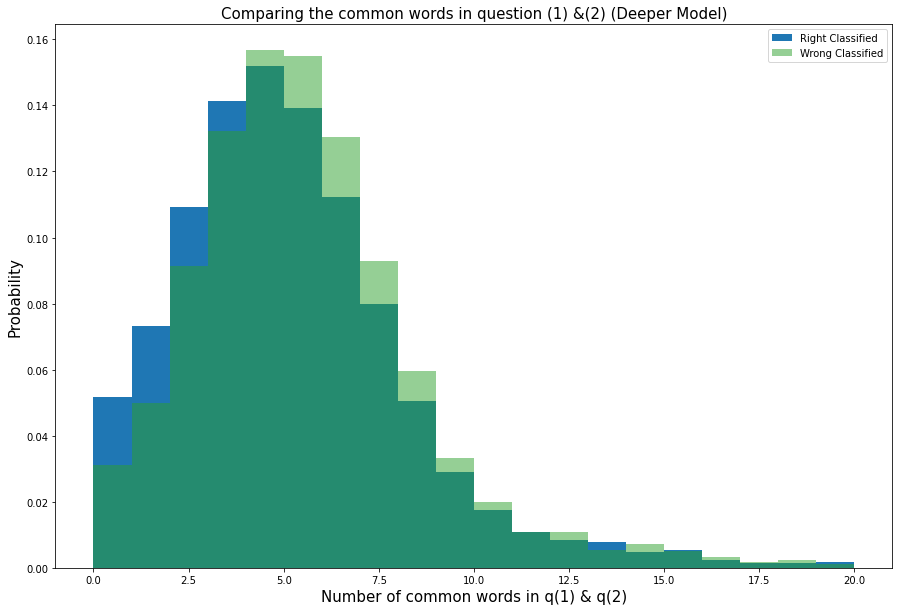

In [38]:
plot_common_words(dense_good_classified['num_common_words'], dense_misclassified['num_common_words'], title='Comparing the common words in question (1) &(2) (Dense Model)')
plot_common_words(deeper_goodclassified['num_common_words'], deeper_misclassified['num_common_words'], title='Comparing the common words in question (1) &(2) (Deeper Model)')